In [3]:
import numpy as np
import scipy.interpolate as interpolate
from astropy.modeling.models import Sersic1D, Sersic2D
from astropy.modeling.core import Fittable1DModel, Parameter
import matplotlib.pyplot as plt
from astropy.visualization import hist



In [4]:
def inverse_transform_sampling(data, n_bins=40, n_samples=1000):
    hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

In [5]:
def gauss(x):
    return np.exp(-x**2 / 2.) / np.sqrt(2.0 * np.pi)

(array([134., 109.,  88.,  79.,  77.,  80.,  73.,  80.,  87., 193.]),
 array([0.05420487, 0.08867802, 0.12315118, 0.15762434, 0.19209749,
        0.22657065, 0.2610438 , 0.29551696, 0.32999011, 0.36446327,
        0.39893642]),
 <a list of 10 Patch objects>)

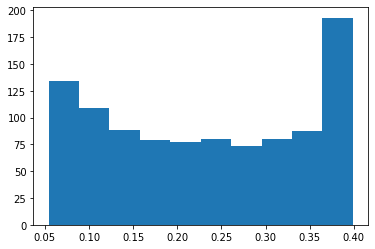

In [6]:
x = np.random.uniform(0,1,100)
x = np.linspace(-2,2,100)
samples = gauss(inverse_transform_sampling(x))
hist(samples)
#plt.plot(samples)

(array([ 50.,  57.,  63.,  77.,  90.,  72.,  71.,  99., 120., 301.]),
 array([0.24286545, 0.25847275, 0.27408006, 0.28968736, 0.30529466,
        0.32090196, 0.33650926, 0.35211656, 0.36772386, 0.38333116,
        0.39893847]),
 <a list of 10 Patch objects>)

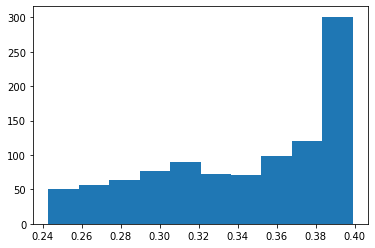

In [14]:
x = np.linspace(-2,2,100)
inv_cdf = interpolate.interp1d(gauss(x), x, bounds_error=False, assume_sorted=True)
r = np.random.uniform(-1, 1, 1000)
ys = inv_cdf(r)
ys = inverse_transform_sampling(gauss(r))

hist(ys)